# Customer Segmentation Using K-means Clustering

## Introduction

Customer segmentation is a powerful tool that helps businesses understand their customer base by grouping individuals with similar behaviors or attributes. By analyzing spending patterns, demographics, and engagement metrics, businesses can design targeted marketing strategies and improve customer satisfaction.

In this project, we use a dataset containing customer data to perform segmentation using the **K-means clustering algorithm**. The objective is to uncover meaningful groups of customers and provide actionable insights for business growth.

## Scope of Work

This notebook is structured as follows:
1. **Data Loading and Cleaning**: Importing the dataset, handling missing values, and ensuring data consistency.
2. **Exploratory Data Analysis (EDA)**: Understanding the data structure, key metrics, and trends through visualizations.
3. **Descriptive Statistics**: Calculating customer behavior metrics, such as average purchase value and frequency.
4. **Feature Selection and Preprocessing**: Preparing data for clustering by selecting relevant features and standardizing the data.
5. **Customer Segmentation**: Using K-means clustering to identify customer segments.
6. **Cluster Analysis and Visualization**: Analyzing the characteristics of each segment and visualizing clusters.
7. **Insights and Recommendations**: Drawing actionable insights for targeted marketing and improved customer engagement.


# Data Loading and Cleaning

To start the analysis, we load the dataset and ensure data quality. Key steps include:
- Importing the dataset.
- Handling missing values or inconsistencies.
- Identifying and removing duplicate records.


In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
#load dataset
file_path='C:/Users/ADMIN/Desktop/WORK/Jobs/Oasis_Internship/ifood_df.csv'
df=pd.read_csv(file_path)
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [4]:
# Cleaning data
## Check for missing values
print('Missing Values: ')
print(df.isnull().sum())
# Duplicates
print(f'Number of duplicate rows: {df.duplicated().sum()}')

# Data types
print("\nData Types:")
print(df.dtypes)
#remove duplicates
df = df.drop_duplicates()

Missing Values: 
Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds      

In [5]:
print(f'Number of duplicate rows: {df.duplicated().sum()}')

Number of duplicate rows: 0


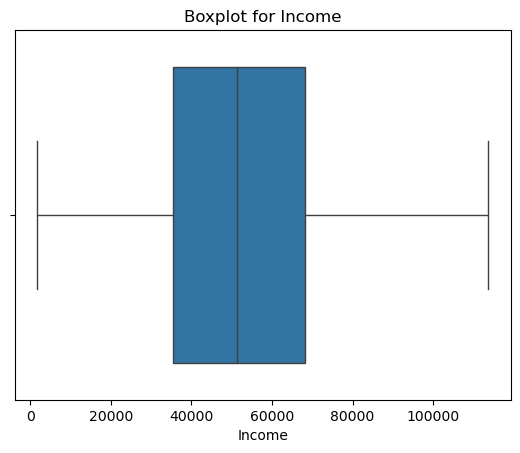

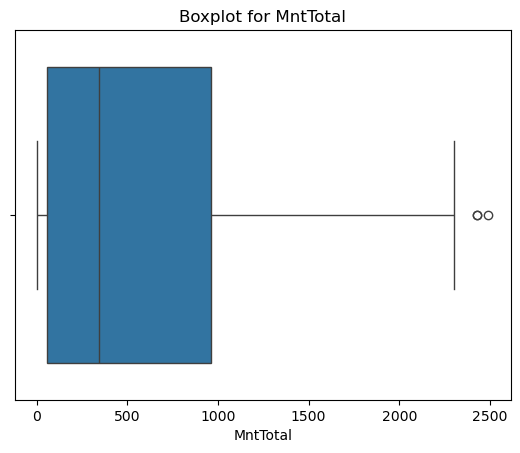

In [15]:
# Checking for outliers
# Boxplot for detecting outliers in 'Income' and 'MntTotal'
sns.boxplot(data=df, x='Income')
plt.title('Boxplot for Income')
plt.show()

sns.boxplot(data=df, x='MntTotal')
plt.title('Boxplot for MntTotal')
plt.show()


In [17]:
#View outliers
Q1 = df['MntTotal'].quantile(0.25)
Q3 = df['MntTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['MntTotal'] < lower_bound) | (df['MntTotal'] > upper_bound)]
outliers.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
1159,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1
1467,87679.0,0,0,62,1259,172,815,97,148,33,...,1,0,0,0,1,0,0,2491,2458,3
1547,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1


In [20]:
#Remove outliers
df = df[(df['MntTotal'] > lower_bound) & (df['MntTotal'] < upper_bound)]
print('Outliers removed')

Outliers removed


## **Descriptive Statistics**
Summary statistics provide insights into numerical columns such as `Income`, `MntTotal`, and `TotalPurchases`. These metrics include:
- Average purchase value
- Purchase_frequency
- Mean
- Median
- Mode
- Standard Deviation

In [22]:
# Calculate the average purchase value for each column of interest
avg_purchase_value = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()
print("Average Purchase Value: \n", avg_purchase_value)
# Frequency of purchases per customer (you can sum the number of purchases for each customer across columns)
purchase_frequency = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
df['TotalPurchases'] = purchase_frequency  # Add this as a new column to the DataFrame
print("\nFrequency of Purchases (Total Purchases): \n", df['TotalPurchases'].describe())
# Central tendency measures for numerical columns
mean_values = df.mean()
median_values = df.median()
mode_values = df.mode().iloc[0]  # mode() returns a DataFrame, so we select the first row

print("\nMean Values:\n", mean_values)
print("\nMedian Values:\n", median_values)
print("\nMode Values:\n", mode_values)
# Calculate the standard deviation for purchase columns
std_dev_values = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].std()
print("\nStandard Deviation of Purchase Columns: \n", std_dev_values)


Average Purchase Value: 
 MntWines            305.178394
MntFruits            26.199703
MntMeatProducts     164.996036
MntFishProducts      37.518335
MntSweetProducts     27.093162
MntGoldProds         43.875619
dtype: float64

Frequency of Purchases (Total Purchases): 
 count    2018.000000
mean       14.887512
std         7.596788
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        43.000000
Name: TotalPurchases, dtype: float64

Mean Values:
 Income                  51630.820119
Kidhome                     0.444004
Teenhome                    0.510406
Recency                    48.893954
MntWines                  305.178394
MntFruits                  26.199703
MntMeatProducts           164.996036
MntFishProducts            37.518335
MntSweetProducts           27.093162
MntGoldProds               43.875619
NumDealsPurchases           2.332012
NumWebPurchases             4.114965
NumCatalogPurchases         2.639247
NumStorePurchases          

# Feature Selection, Preprocessing and Customer Segmentation

Relevant focus
- We standardize the features to ensure equal weight during clustering.
- Using the **K-means clustering algorithm**, we segment customers into distinct groups.
  The Elbow Method is used to determine the optimal number of clusters.



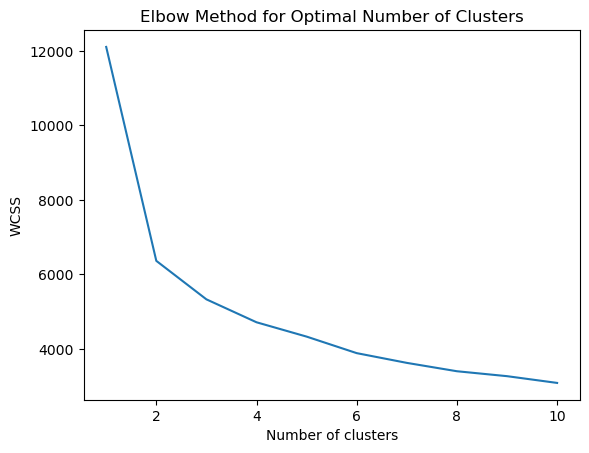

In [25]:
# Data Preparation for Clustering
features = ['Income', 'NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases', 'MntTotal', 'Age']
X = df[features]

# Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Determine the Optimal Number of Clusters (using Elbow Method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# **Visualizing Clusters**

Once the clustering has been performed, it's important to visualize the results to better understand the distribution of customer segments. We'll use various plots to illustrate the relationships between features and the identified clusters.

---

## **Scatter Plot: Income vs. MntTotal**

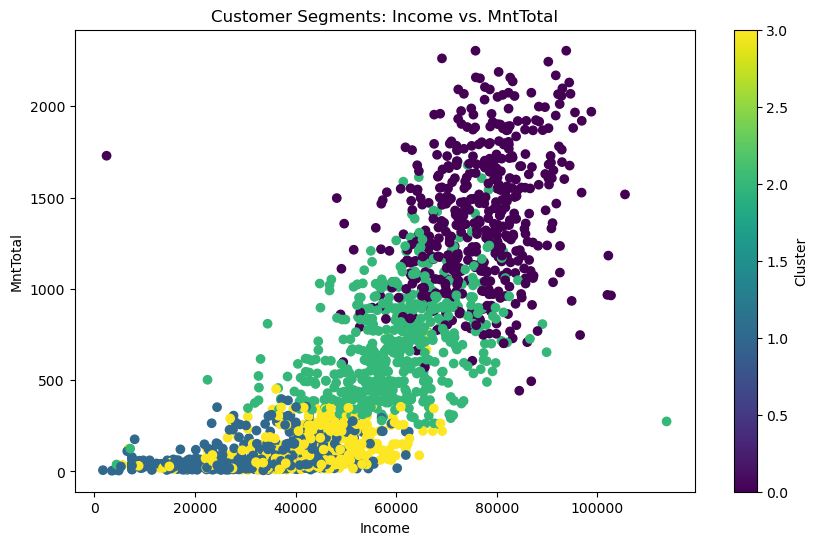

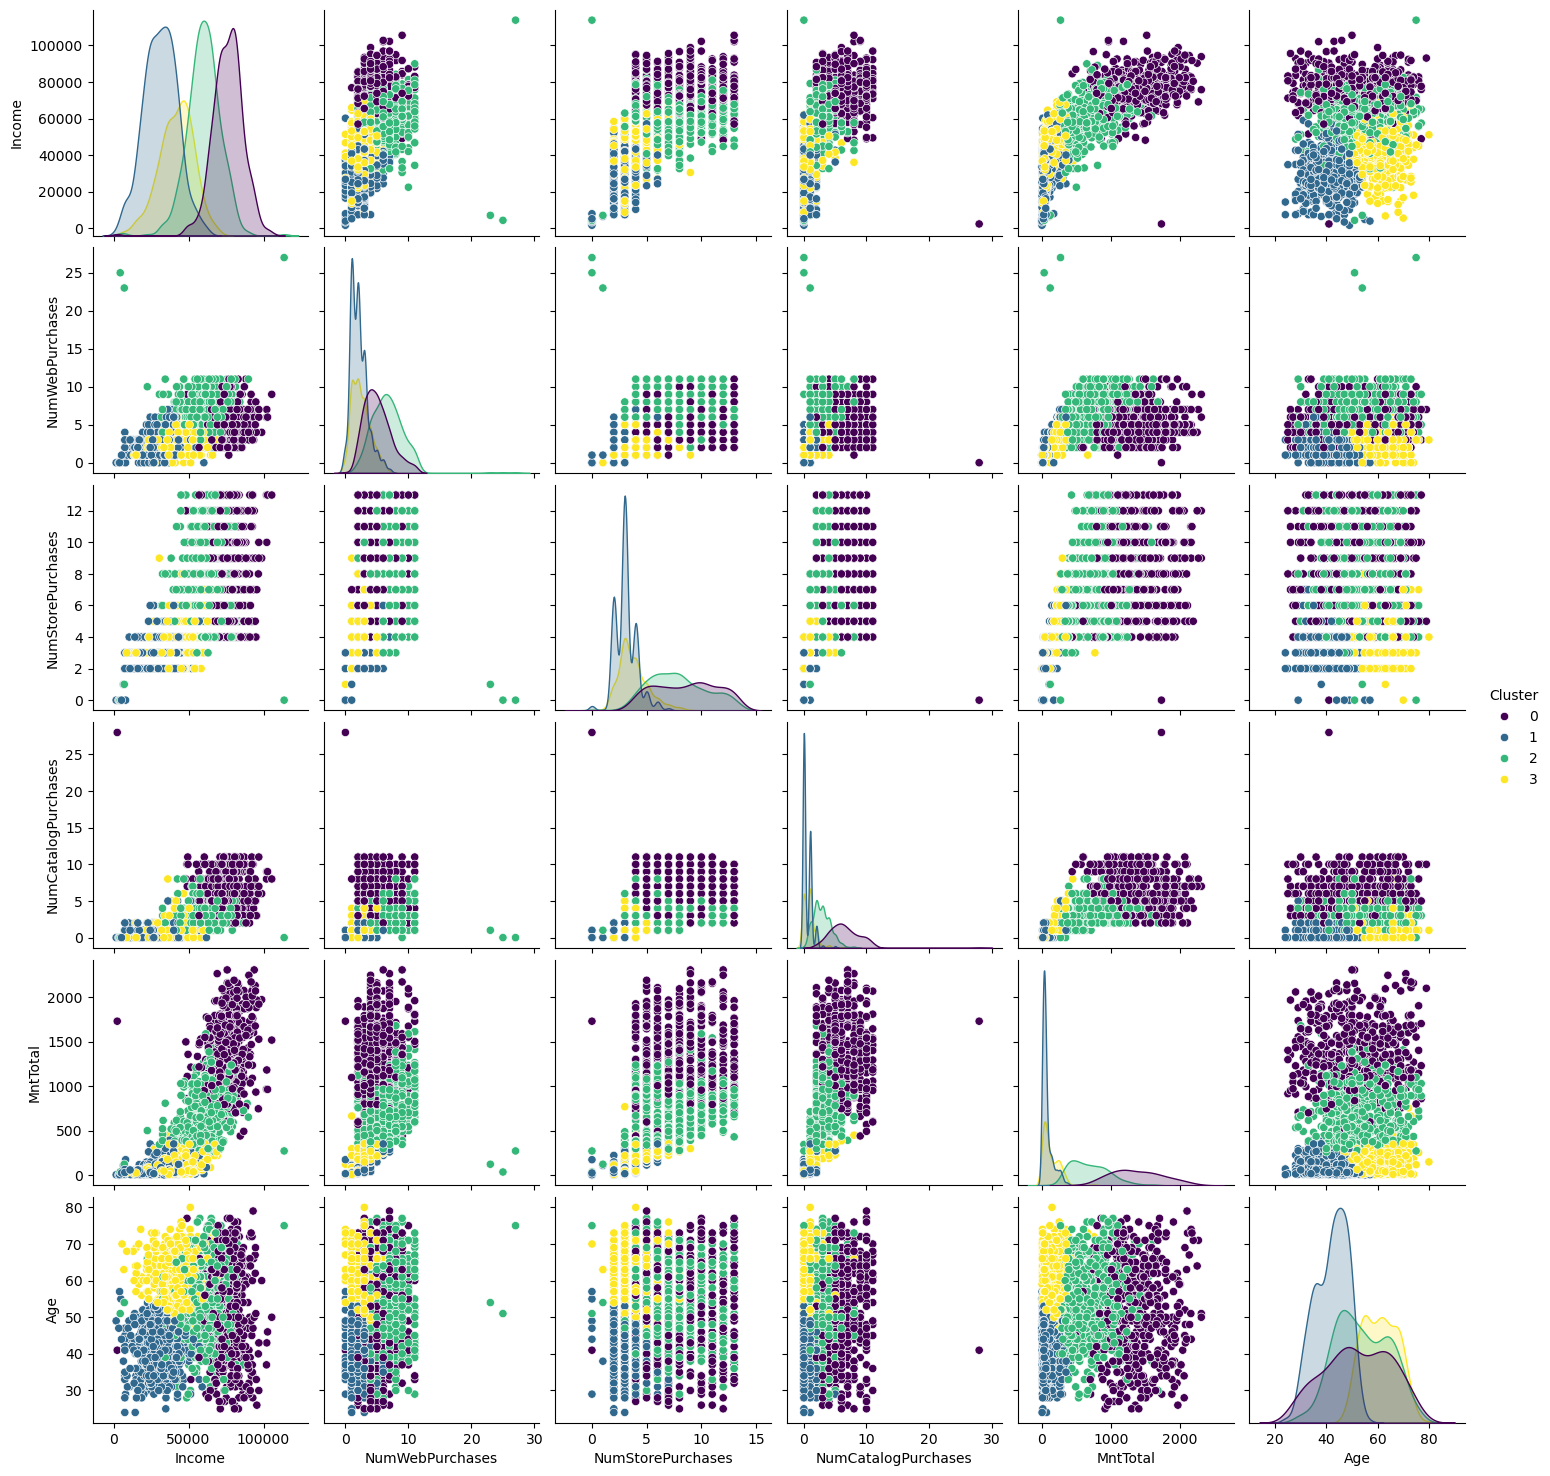

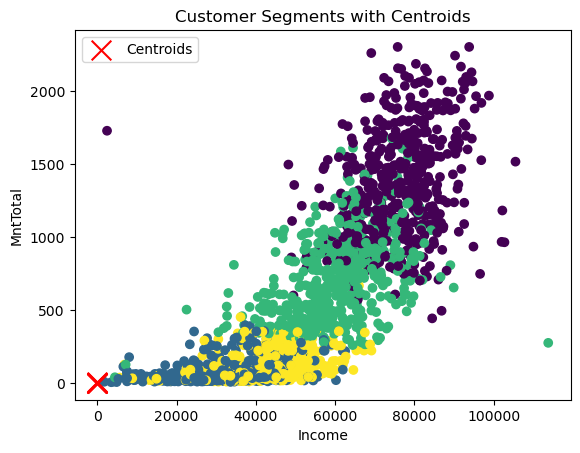

In [30]:
# Visualizing Clusters with Scatter Plot (using 'Income' and 'MntTotal' for illustration)
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.scatter(df['Income'], df['MntTotal'], c=df['Cluster'], cmap='viridis')
plt.title('Customer Segments: Income vs. MntTotal')
plt.xlabel('Income')
plt.ylabel('MntTotal')
plt.colorbar(label='Cluster')
plt.show()

# Pairplot to visualize more features
sns.pairplot(df[features + ['Cluster']], hue='Cluster', palette='viridis')
plt.show()

# Plotting Centroids
centroids = kmeans.cluster_centers_
plt.scatter(df['Income'], df['MntTotal'], c=df['Cluster'], cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='red', label='Centroids')
plt.title('Customer Segments with Centroids')
plt.xlabel('Income')
plt.ylabel('MntTotal')
plt.legend()
plt.show()

# **Insights and Recommendations**


In [31]:

# Analyzing the characteristics of each segment
segment_summary = df.groupby('Cluster').agg(
    Income_mean=('Income', 'mean'),
    MntTotal_mean=('MntTotal', 'mean'),
    # Add more feature columns if needed
)

# Display the segment summary to understand the characteristics of each cluster
print(segment_summary)

# Example insights
for cluster in segment_summary.index:
    print(f"\nInsights for Cluster {cluster}:")
    print(f"  - Average Income: {segment_summary.loc[cluster, 'Income_mean']}")
    print(f"  - Average MntTotal: {segment_summary.loc[cluster, 'MntTotal_mean']}")
    # You can include more insights here based on other features

    # Example business recommendation
    if segment_summary.loc[cluster, 'Income_mean'] > 50000:
        print(f"  - This cluster has a high income, consider targeting them with premium offerings.")
    else:
        print(f"  - This cluster has a lower income, consider focusing on budget-friendly options.")


          Income_mean  MntTotal_mean
Cluster                             
0        76060.288066    1372.724280
1        31192.717073      74.263415
2        59980.061567     688.805970
3        41713.545932     131.372703

Insights for Cluster 0:
  - Average Income: 76060.28806584362
  - Average MntTotal: 1372.724279835391
  - This cluster has a high income, consider targeting them with premium offerings.

Insights for Cluster 1:
  - Average Income: 31192.71707317073
  - Average MntTotal: 74.26341463414634
  - This cluster has a lower income, consider focusing on budget-friendly options.

Insights for Cluster 2:
  - Average Income: 59980.06156716418
  - Average MntTotal: 688.8059701492538
  - This cluster has a high income, consider targeting them with premium offerings.

Insights for Cluster 3:
  - Average Income: 41713.545931758534
  - Average MntTotal: 131.3727034120735
  - This cluster has a lower income, consider focusing on budget-friendly options.


# **Recommendations**

## **Cluster 0: High Income, High Spending**
- **Characteristics**: High income, high spending. These are likely your most valuable customers.
- **Recommendations**:
  - Focus on **exclusive offers**, **loyalty programs**, and **personalized recommendations** for high-end products.
  - Implement a strong **Customer Relationship Management (CRM)** strategy to build long-term relationships.
  - Offer a **curated selection of premium products** and unique experiences.

## **Cluster 1: Low Income, Low Spending**
- **Characteristics**: Low income, low spending. These customers may have limited budgets or be less engaged.
- **Recommendations**:
  - Provide **budget-friendly options**, **discounts**, and **promotions** to attract and retain these customers.
  - Highlight **value-for-money products** to cater to their price sensitivity.
  - Offer **introductory deals** to encourage initial purchases.

## **Cluster 2: High Income, Moderate Spending**
- **Characteristics**: High income, but moderate spending. These customers have potential to spend more.
- **Recommendations**:
  - Employ **upselling and cross-selling** strategies to encourage higher spending.
  - Use **personalized recommendations** to match their preferences and drive engagement.
  - Develop **tiered loyalty programs** with attractive rewards to incentivize repeat purchases.

## **Cluster 3: Low Income, Low Spending**
- **Characteristics**: Similar to Cluster 1, these customers have limited budgets and low engagement.
- **Recommendations**:
  - Use **value-based marketing** to emphasize product benefits and affordability.
  - Introduce **limited-time offers** to create urgency and drive purchases.
  - Implement **referral programs** to grow the customer base through incentives.

## **Overall Recommendations**
- Continuously apply **data-driven decision-making** to refine segmentation and strategies.
- Conduct **Customer Lifetime Value (CLTV) analysis** to prioritize resources on high-potential clusters.
- Regularly measure **customer satisfaction** and address any concerns promptly.
- Perform **competitive analysis** to identify differentiation opportunities and maintain a competitive edge.
